# Biodiversity changes in Phoenix, AZ
### Author: Kylie Newcomer
Published: 12/06/2025

[GitHub Repository]('https://github.com/kylienewcomer/eds220-final-project.git)

## About
### Purpose
Visualize how the increase in urban areas in Phoenix, has impacted Biodiversity Intactness Index (BII).

### Highlights
- Utilize catalog data
- Work with raster data
- Visualize changes in BII

### Data
- The Biodiversity Intactness Index (BII) data comes from the [Microsoft Planetary Computer STAC](https://planetarycomputer.microsoft.com/dataset/io-biodiversity) catalog and focuses only on 2017 and 2020. 
- The Phoenix county subdivision data is from the [US Census Bureau](https://catalog.data.gov/dataset/tiger-line-shapefile-current-state-arizona-county-subdivision)

## References
Microsoft Open Source, Matt McFarland, Rob Emanuele, Dan Morris, Tom Augspurger, microsoft/PlanetaryComputer: October 2022, https://doi.org/10.5281/zenodo.7261897

U.S. Department of Commerce, U.S. Census Bureau, TIGER/Line Shapefile, Current, State, Arizona, County Subdivision, https://www2.census.gov/geo/tiger/TIGER2024/COUSUB/tl_2024_04_cousub.zip [Date Access: 12/06/2025]

## Import necessary packages
To start out, the necesary packages for working with geospatial data such as `geopandas` and `xarray` are imported. Additionally, `pystac_client` is imported to access the STAC catalogs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
from shapely.geometry import Polygon
import pandas as pd
import xarray as xr

from pystac_client import Client  # To access STAC catalogs

import planetary_computer  # To sign items from the MPC STAC catalog 

from IPython.display import Image 

import contextily as ctx
import matplotlib.patches as patches

## Access biodiversity data
The Phoenix biodiversity data can be accessed from the Microsoft Planetary Computer STAC catalog.

In [2]:
# Access MPC catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
collections = list(catalog.get_collections()) 
bii = catalog.get_child('io-biodiversity')
bii

<CollectionClient id=io-biodiversity>

To look at the change of biodiversity, we want to select the years of interest: 2017 and 2020. We need to create a bounding box of Phoenix. Using the bounding box and specified time periods, we can search the catalog for the BII of Phoenix in both 2017 and 2020.

In [3]:
# Create 2017 time range
time_17 = "2017-01-01/2017-12-31"
# Create 2020 time range
time_20 = "2020-01-01/2020-12-31"

In [4]:
# Make bounding box for Phoenix
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

In [5]:
# Catalog search for 2017 dates
search_17 = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_17)
search_17
# Get items from search
items_17 = search_17.item_collection()

# Determine number of items in search
print(f'There are {len(items_17)} items in the catalog search')

There are 1 items in the catalog search


In [6]:
# Pull out only item
item_17 = items_17[0]

Now that we have our single raster for 2017, let's look at information about it.

In [7]:
print('ID', item_17.id)
item_17.properties

ID bii_2017_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:shape': [7992, 7992],
 'end_datetime': '2017-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2017-01-01T00:00:00Z',
 'proj:code': 'EPSG:4326'}

We can use `rioxarray` to access the assets from the item data.

In [8]:
bii_17 = rioxr.open_rasterio(item_17.assets['data'].href)
bii_17

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

There is a band with a single value, so let's "squeeze" that out of the data frame to make it 2 dimensional.

In [9]:
# Remove `band` dimension
bii_17 = bii_17.squeeze().drop_vars('band')
print("Dimensions: ", dict(bii_17.sizes))

Dimensions:  {'y': 7992, 'x': 7992}


Now that we have some information about the 2017 raster, we can look at the image.

In [10]:
Image(url = item_17.assets['rendered_preview'].href)

Let's repeat those steps to look at the data from 2020

In [11]:
# Catalog search for 2020 dates
search_20 = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_20)
search_20
# Get items from search
items_20 = search_20.item_collection()

# Determine number of items in search
print(f'There are {len(items_20)} items in the catalog search')

There are 1 items in the catalog search


In [12]:
# Pull out single item
item_20 = items_20[0]

In [13]:
# Look at item properties
print('ID', item_20.id)
item_20.properties

ID bii_2020_34.74464974521749_-115.38597824385106_cog


{'datetime': None,
 'proj:shape': [7992, 7992],
 'end_datetime': '2020-12-31T23:59:59Z',
 'proj:transform': [0.0008983152841195215,
  0.0,
  -115.38597824385106,
  0.0,
  -0.0008983152841195215,
  34.74464974521749,
  0.0,
  0.0,
  1.0],
 'start_datetime': '2020-01-01T00:00:00Z',
 'proj:code': 'EPSG:4326'}

In [14]:
item_20.assets

{'data': <Asset href=https://pcdata01euw.blob.core.windows.net/impact/bii-v1/bii_2020/bii_2020_34.74464974521749_-115.38597824385106_cog.tif?st=2025-12-11T19%3A30%3A12Z&se=2025-12-12T20%3A15%3A12Z&sp=rl&sv=2025-07-05&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-12-12T17%3A23%3A05Z&ske=2025-12-19T17%3A23%3A05Z&sks=b&skv=2025-07-05&sig=gn90aYygF5zrpszDuvWFe/u1kUD9bGxF/oNo8Jllh/E%3D>,
 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=io-biodiversity&item=bii_2020_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97%2A%28data_b1%2A%2A3.84%29&format=png>,
 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=io-biodiversity&item=bii_2020_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97

In [15]:
bii_20 = rioxr.open_rasterio(item_20.assets['data'].href)
bii_20

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [16]:
# Remove `band` dimension
bii_20 = bii_20.squeeze().drop_vars('band')
print("Dimensions: ", dict(bii_20.sizes))

Dimensions:  {'y': 7992, 'x': 7992}


Through our data exploration, we can see that both rasters have the same CRS (ESPG:4326) and dimensions/shape which will make things easier later on when comparing them. Now we can look at our 2020 image.

In [17]:
Image(url = item_20.assets['rendered_preview'].href)

## Phoenix Subdivision
To narrow down the area of interest further, we will use the Phoenix county subdivision from the Census Bureau. We will explore the data and get an idea of how we can utilize it for our raster data.

In [18]:

az = gpd.read_file('data/tl_2024_04_cousub/tl_2024_04_cousub.shp')

In [19]:
az.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,0600000US0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,S,12231962349,44576380,+35.1066122,-111.3662507,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,0600000US0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,S,7228864156,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,0600000US0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,S,2342313339,3772690,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,0600000US0402392295,Nogales,Nogales CCD,22,Z5,G4040,S,1762339489,2382710,+31.4956020,-111.0171332,"POLYGON ((-111.36692 31.52136, -111.36316 31.5..."
4,04,023,92550,01934966,0402392550,0600000US0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,S,1439560139,685527,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


In [20]:
az.dtypes

STATEFP       object
COUNTYFP      object
COUSUBFP      object
COUSUBNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [21]:
# Look at unique subdivision names
az['NAME'].unique()

array(['Flagstaff', 'Kaibab Plateau', 'Hualapai', 'Nogales', 'Patagonia',
       'Hopi', 'Tuba City', 'Clifton', 'Duncan', 'Chandler', 'Phoenix',
       'Tonto National Forest', 'Gila Bend', 'Wickenburg', 'Deer Valley',
       'Buckeye', 'St. Johns', 'Salt River', 'Tucson', 'Arivaca',
       'Indian Wells', 'Winslow-Holbrook', 'Snowflake', 'Kayenta',
       'Lake Havasu City', 'Fort Apache', 'Bisbee', 'Bowie', 'Willcox',
       'North Mohave', 'Kingman', 'Bullhead City', 'Congress',
       'Mingus Mountain', 'Florence', 'North Pinal', 'San Manuel', 'Eloy',
       'Chinle', 'Sweetwater', 'Fort Defiance', 'Dennehotso', 'Puerco',
       'Ash Fork', 'Cordes Lakes-Mayer', 'Camp Verde-Sedona', 'Prescott',
       'Piñon', 'Payson', 'Winkelman', 'Globe-Miami', 'Tonto Basin',
       'Gila River', 'Casa Grande', 'Maricopa-Stanfield',
       "Tohono O'odham Nation", 'Coolidge', 'Ajo', 'Marana', 'Somerton',
       'Bonita-Klondyke', 'Eagar-Springerville', 'San Carlos',
       'Havasupai', 'William

Upon exploration, we will only need the geometry and `NAME` of the subdivision to create our boundary. We can filter to just the Phoenix subdivision and plot that to see how our final image's boundaries will look.

In [22]:
# Select only Phoenix
phoenix = az[az['NAME'] == "Phoenix"]
phoenix

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
10,04,013,92601,01934968,0401392601,0600000US0401392601,Phoenix,Phoenix CCD,22,Z5,G4040,S,2806483087,9458600,+33.5211331,-112.0284405,"POLYGON ((-112.47014 33.55996, -112.47011 33.5..."


<Axes: >

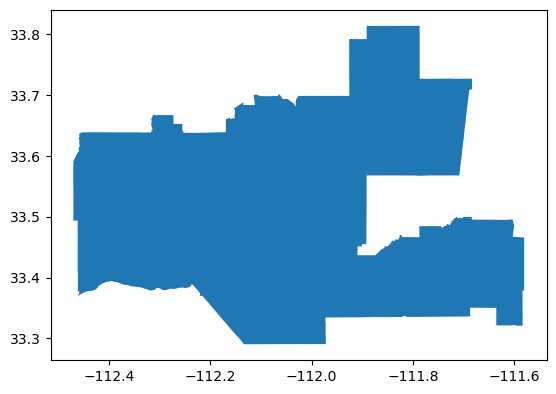

In [23]:
# Initial visualization
phoenix.plot()

## Phoenix subdivision in context with the area
To visualize the subdivision in relation with the area, we can use `contextly` to access a basemap which shows the surrounding areas of the subdivision.

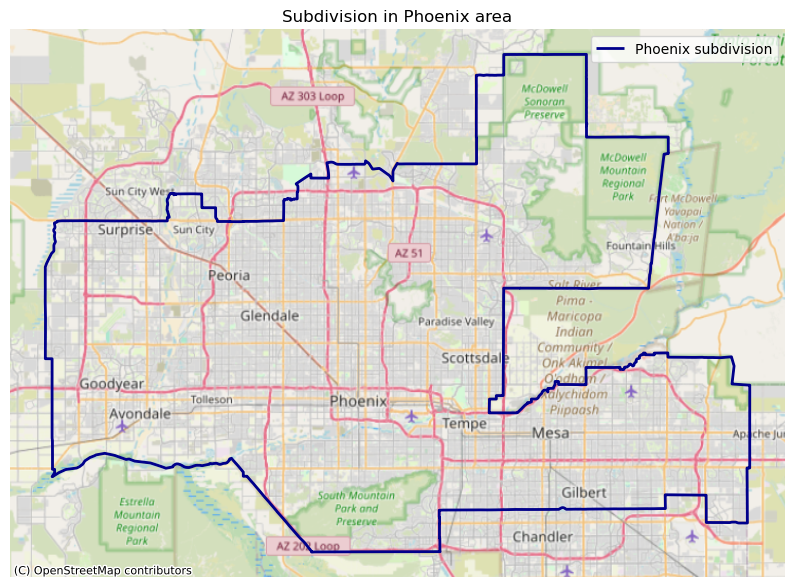

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.axis('off')

phoenix.plot(ax = ax,
            color = "none")

phoenix.boundary.plot(ax=ax,
                color = "darkblue",
                linewidth = 2,
                label = "Phoenix subdivision")
plt.legend()

# Use contextily for basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,
               crs = phoenix.crs)

plt.title('Subdivision in Phoenix area')

plt.show()


## Biodiversity in Phoenix subdivision
After exploring the BII data and Phoenix subdivision data, we can combine them together to find the BII changes within the subdivision.

In order to combine the biodiversity and phoenix boundary data, we need to match the CRS. For effeciency, we have previously confirmed the 2017 and 2020 biodiversity match, so we only need to do one transformation.

In [25]:
# Change Phoenix CRS to match BII
phoenix = phoenix.to_crs(bii_17.rio.crs)

# Check that Phoenix subdivsion crs has changed
assert phoenix.crs == bii_17.rio.crs

In [26]:
clip_bii_17 = bii_17.rio.clip_box(*phoenix.total_bounds).rio.clip(phoenix.geometry)

We can plot the clipped raster to confirm it worked

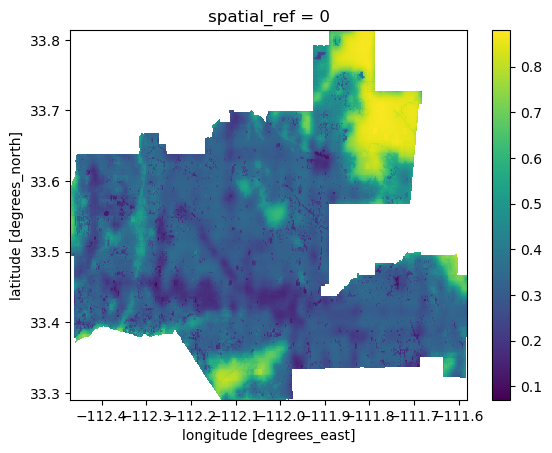

In [27]:
clip_bii_17.plot()

Let's clip the BII in 2020

In [28]:
clip_bii_20 = bii_20.rio.clip_box(*phoenix.total_bounds).rio.clip(phoenix.geometry)

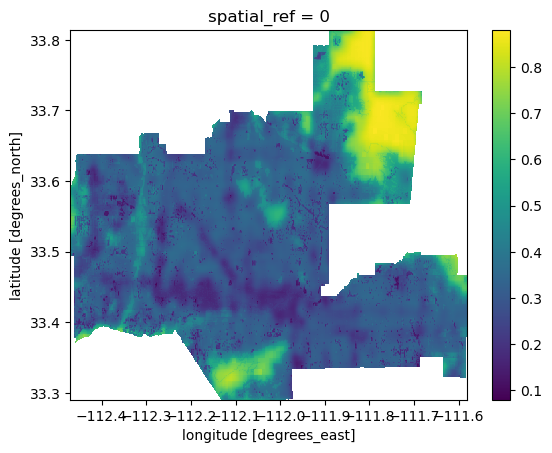

In [29]:
clip_bii_20.plot()

## Calculate area of BII >= 0.75
To determine the area of the rasters that had a BII >= 0.75, we can filter the values out to include only the cells of interest. We can then calculate the total number of cells using `.sum()`. To determine the percent of area, we need to calculate the total number of cells in the BII rasters using `.count()`. The cells with BII >= 0.75 cna then be divided by the total number of cells and multiplied by 100 to get the percentage in 2017 and 2020.

In [30]:
# Select for only cells where 2017 BII data is above 0.75
bii_17_75 = clip_bii_17 >= 0.75

In [31]:
# Calculate the percentage of area of Phoenix with a BII of at least 0.75 in  2017
perc_bii_17_75 = (bii_17_75.sum() / clip_bii_17.count()) * 100
print(f"{perc_bii_17_75:.2f}% of the Phoenix area had 0.75 or greater BII in 2017")


7.13% of the Phoenix area had 0.75 or greater BII in 2017


Now we can repeat those steps for 2020.

In [32]:
# Select for only where 2017 BII data is above 0.75
bii_20_75 = clip_bii_20 >= 0.75

# Calculate the percentage of area of Phoenix with a BII of at least 0.75 in  2020
perc_bii_20_75 = (bii_20_75.sum() / clip_bii_20.count()) * 100
print(f"{perc_bii_20_75:.2f}% of the Phoenix area had 0.75 or greater BII in 2020")

6.49% of the Phoenix area had 0.75 or greater BII in 2020


## Determine difference in BII from 2017 to 2020
Now that we've determine the areas in 2017 and 2020 with a BII >= 0.75, we can apply raster algebra on them to determine the areas that lost biodiversity. 

In [33]:
# Transform values to integers for raster algebra
bii_17_int = bii_17_75.astype(int)
bii_20_int = bii_20_75.astype(int)
# Calculate the loss from 2017 to 2020
bii_diff = bii_17_int - bii_20_int

In [34]:
# Filter out 0's to determine where biodiversity 
bii_diff = bii_diff.where(bii_diff != 0)

We can vizualize the areas where a BII >= 0.75 was lost from 2017 to 2020.

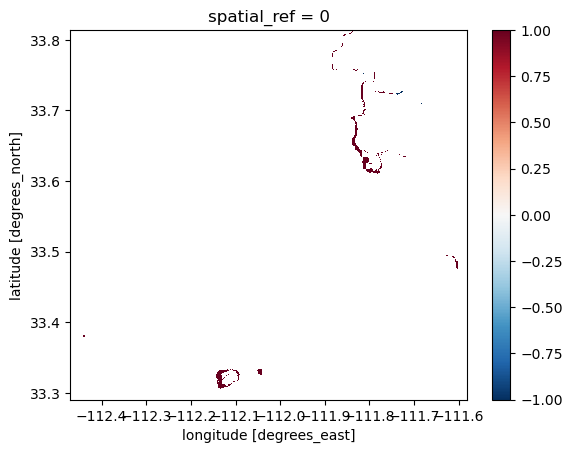

In [35]:
bii_diff.plot()

## Visualize change in BII

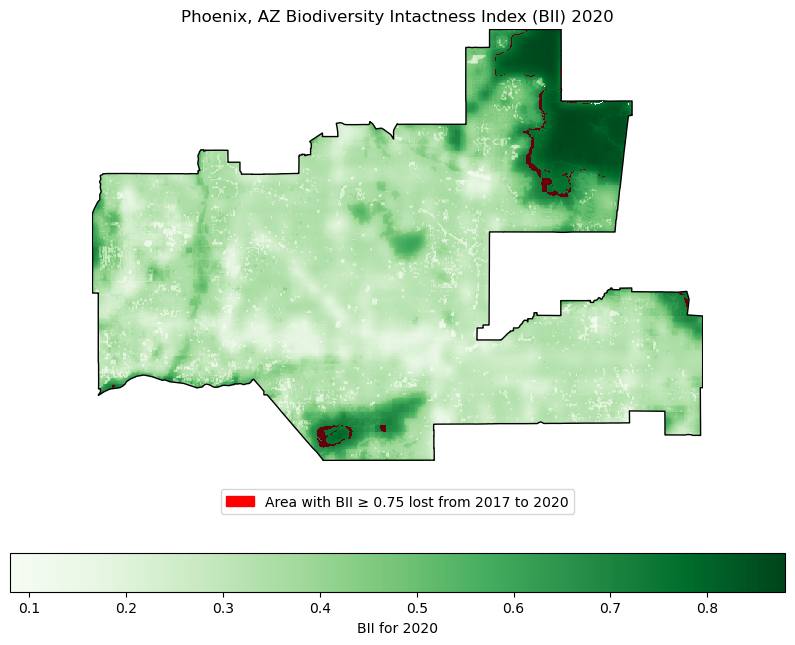

In [36]:
# Create plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.axis('off')
# Plot clipped 2020 BII 
clip_bii_20.plot(ax = ax,
                   cmap = "Greens",
                   cbar_kwargs = {'location': 'bottom', 'label':'BII for 2020'})

# Plot Phoenix subdivision border
phoenix.plot(ax = ax,
             edgecolor = "black",
             color = "none" 
                 )

# 
bii_diff.plot(
    ax=ax,
    cmap="Reds",
    add_colorbar = False)

legend_elements = [patches.Patch(facecolor='red', edgecolor='r',
                         label='Area with BII ≥ 0.75 lost from 2017 to 2020')]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

plt.title('Phoenix, AZ Biodiversity Intactness Index (BII) 2020')


plt.show()

## Conclusion
Overall, we did see a loss of biodiversity from 2017 to 2020 in Phoenix. In 2017, Phoenix had a BII greater than or equal to 0.75 in about 7.12% of the area. We saw in 2020 that it was reduced to 6.49%, resulting in a loss of a little over 0.5%.The figure shows a few noteable areas where there was a loss of 0.75 or greater BII, leading to the conclusion that those areas experience more urban development over the 3 years. Those losses are near some of the higher BII in the area, which could mean there is a risk of that area further losing biodiversity due to increases in urban areas.